In [1]:
%run ../../macro_tQ.py
import sys
sys.path.append('../../')
import macro_tQ as tQ

import numpy as np
import scipy.linalg as la
from IPython.display import display,Markdown,Latex
import matplotlib.pyplot as plt
from qiskit.tools.visualization import array_to_latex
from IPython.display import display, Latex

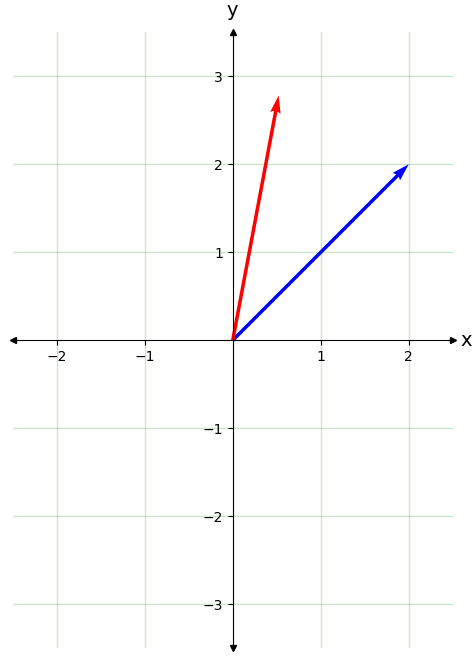

In [2]:
'''ángulo que queremos rotar'''
theta=0.6 

'''vector a rotar'''
u1=2.
u2=2.

'Función que rota un vector tratándolo como un número complejo'
def R(u1,u2,theta):
        u = u1 + u2*1j
        v = u*np.exp(1j*theta) # u rotado un angulo theta
        return v.real,v.imag
    
'''v1 y v2 a partir de u1, u2 y theta'''
v1,v2 =  R(u1,u2,theta)

''' Representación en el plano complejo '''
v = v1**2+v2**2
tQ.plot_2D_plane(left=-int(abs(v1))-2,right=int(abs(v1))+2,up=int(abs(v2))+1,down=-int(abs(v2))-1)
tQ.draw_vector(u1,u1,vcolor='b')
tQ.draw_vector(v1,v2,vcolor='r')


In [3]:
'definimos una matriz'
U=np.matrix([[1,1J],[1J, + 1]])/np.sqrt(2)
array_to_latex(U)

<IPython.core.display.Latex object>

In [4]:
'getH es un método de la clase matrix que devuelve la matriz conjugada hermítica'
Uadj=U.getH() 
array_to_latex(Uadj)

<IPython.core.display.Latex object>

In [5]:
'comprobamos que U es unitaria'
array_to_latex(np.dot(Uadj,U))

<IPython.core.display.Latex object>

In [6]:
d = 3
'generamos un vector aleatorio'
u = tQ.random_ket(d)
#display(array_to_latex(u))

'construimos los proyectores paralelo y perpendicular'
P_par = tQ.ket_bra(u,u);
P_perp = np.identity(d) - P_par

#display(array_to_latex(P_par))
#display(array_to_latex(P_perp))

In [7]:
' verificamos la propiedad  P^2 = P, y la ortogonalidad '
A = P_par@P_par - P_par
B = P_perp@P_perp - P_perp
C = P_par@P_perp

#display(array_to_latex(A))
#display(array_to_latex(B))
display(array_to_latex(C))

<IPython.core.display.Latex object>

In [8]:
' obtener las proyecciones paralela y perpendicular de otro vector v'
v = tQ.random_ket(d)

v_par = np.dot(P_par,v)
v_perp = np.dot(P_perp,v)

' verificar perpendicularidad'
print(np.round(tQ.braket(v_par,v_perp),4))

(-0+0j)


In [9]:
d = 2
' en general una matriz no será normal '
A = np.matrix(np.random.rand(d,d)+ np.random.rand(d,d) * 1j)
display(array_to_latex(np.dot(A,A.getH()) - np.dot(A.getH(),A)))

eigvals, eigvecs = np.linalg.eig(A)
print('valprop =',eigvals)

'verificamos que los autovectores son las columnas de v'
m=1 #cambiar a otro valor
display(array_to_latex(np.dot(A, eigvecs[:, m]) - eigvals[m] * eigvecs[:, m],prefix=r'A|\lambda_m \rangle -\lambda_m |\lambda_m\rangle =  '))

' diagonalizamos A '
U = np.matrix(eigvecs);

array_to_latex(np.dot(U.getI(),np.dot(A,U)),prefix='A_{diag} = U^{-1} A U = ')

'U no es unitaria'
array_to_latex(np.dot(U,U.getH()))

<IPython.core.display.Latex object>

valprop = [0.14099917+0.71269589j 0.7337014 +1.15586706j]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [10]:
d = 2
'veamos ahora una matriz normal. En particular podemos tomar la parte hermítica de A'
H = 0.5*(A + A.getH())

'verificamos que es normal'
display(array_to_latex(np.dot(H,H.getH()) - np.dot(H.getH(),H)))


eigvals, eigvecs = np.linalg.eig(H)
print('valprop =',eigvals)

'verificamos que los autovectores son las columnas de v'
m=1 #cambiar a otro valor
display(array_to_latex(np.dot(H, eigvecs[:, m]) - eigvals[m] * eigvecs[:, m],prefix=r'H|\lambda_m \rangle -\lambda_m |\lambda_m\rangle =  '))

' diagonalizamos H '
U = np.matrix(eigvecs);

array_to_latex(np.dot(U.getH(),np.dot(H,U)),prefix='H_{diag} = U^{\dagger} H U = ')

'U es unitaria'
array_to_latex(np.dot(U,U.getH()))

<IPython.core.display.Latex object>

valprop = [0.01986956+0.j 0.85483101+0.j]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [11]:
'definamos un operador normal'
A = np.array([[1, 1], [-1, 1]])
array_to_latex(A)

' Realizamos la descomposición espectral'
eigvals, eigvecs = np.linalg.eig(A)

eigvec0 = eigvecs[:,0]
P0 = tQ.ket_bra(eigvec0,eigvec0)
display(array_to_latex(P0,prefix='P_0='))

eigvec1 = eigvecs[:,1]
P1 = tQ.ket_bra(eigvec1,eigvec1)
display(array_to_latex(P1,prefix='P_1='))

'verificamos completitud'
array_to_latex(P0+P1,prefix='P_0 + P_1=')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [12]:
A_descomp_espect = eigvals[0]*P0+eigvals[1]*P1

array_to_latex(A_descomp_espect)

<IPython.core.display.Latex object>

In [13]:
'''Método para construir una matriz unitaria arbitraria usando la descomposición polar'''
d = 3
A = np.matrix(np.random.rand(d,d)+ np.random.rand(d,d) * 1j)

#u, s, vh = linalg.svd(A, full_matrices=False)
u,r = la.polar(A)
    
R = np.matrix(r) 
' verificamos que R sólo tiene autovalores no-negativos '
Reigval, Reigvec = la.eig(R)
print(np.round(Reigval,3))

U=np.matrix(u) 
display(Latex('$$U = %s$$'%MatrixToLatex(U)))

''' Verifiquemos unitariedad '''
display(Latex('$$U^{\dagger}U = %s$$'%MatrixToLatex(np.dot(U.getH(),U))))

''' verificamos que los autovalores de U son fases'''
np.round([la.eig(U)[0][i]*la.eig(U)[0][i].conjugate() for i in range(d)],5)

[2.055+0.j 0.22 -0.j 0.542+0.j]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

array([1.+0.j, 1.+0.j, 1.+0.j])

In [14]:
'numpy tiene la función svd para descomponer en valores singulares'

A = np.random.randn(3,2)+ 1j*np.random.randn(3,2)
display(array_to_latex(A,prefix='A='))
print( 'the shape of A is :', A.shape)


u, s, vh = la.svd(A, full_matrices=True)

print( 'the shape of u =',u.shape, ' s =', s.shape,' v =', vh.shape)

<IPython.core.display.Latex object>

the shape of A is : (3, 2)
the shape of u = (3, 3)  s = (2,)  v = (2, 2)


In [15]:
U=np.matrix(u)
S=np.matrix(np.diag(s))
V=np.matrix(vh).getH()

display(array_to_latex(U,prefix='U='))
display(array_to_latex(S,prefix='S='))
display(array_to_latex(V,prefix='V='))

'''Verifiquemos unitariedad'''
display(array_to_latex(np.dot(U.getH(),U),prefix='U^{\dagger}U ='))
display(array_to_latex(np.dot(V.getH(),V),prefix='V^{\dagger}V ='))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [16]:
d = 2
A = 0.2*np.matrix(np.random.rand(d,d)+ np.random.rand(d,d) * 1j)

' exponencial '
array_to_latex(expm(A),prefix='e^A = ')

display(array_to_latex(expm(A),prefix='e^A = '))

' serie truncada a orden cuadrático'
Id = np.matrix(np.identity(d))
power_series = Id + A + 1./2*A*A 

display(array_to_latex(power_series,prefix= r'I + A + \frac{1}{2}A^2 = '))


NameError: name 'expm' is not defined

In [17]:
s0 = np.matrix([[1,0],[0,1]])
s1 = np.matrix([[0,1],[1,0]])
s2 = np.matrix([[0,-1j],[1j,0]])
s3 = np.matrix([[1,0],[0,-1]])


'verifica todas las opciones'
print(s1*s1==s0)
print(s1*s2==1j*s3)
print(s2*s1==-1j*s3)
print(s2*s1*s2==-s1)
print(s1*s1==s0)

[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]


In [18]:
' vamos a verificar numéricamente'
from scipy.linalg import expm

' vectors a and sigma'
avec = np.random.rand(3)
sigvec = np.array([s1,s2,s3])


'exponentiating'
adots= sum(list(avec[i]*sigvec[i] for i in range(3)))
e1 = expm(1j*adots)


'using the Euler-like formula'
a = np.linalg.norm(avec)
nvec = avec/a
ndots= sum(list(nvec[i]*sigvec[i] for i in range(3)))
e2 = np.cos(a)*s0 + 1j*np.sin(a)*(nvec[0]*sigvec[0]+nvec[1]*sigvec[1]+nvec[2]*sigvec[2])

'verify'
display(array_to_latex(e1,prefix='exp(s1)='))
display(array_to_latex(e2,prefix='exp(s1)='))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>